### Created by - Sanjana Pal

## Problem Statement

Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not
Marital.Status : marital status of a person
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
Work Experience : Work experience of an individual person
Urban : Whether that person belongs to urban area or not



In [1]:
# importing Library
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as pe
import pandas_bokeh
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv("Fraud_check.csv")

In [3]:
df.head()

Undergrad Marital.Status  Taxable.Income  City.Population  Work.Experience  \
0        NO         Single           68833            50047               10   
1       YES       Divorced           33700           134075               18   
2        NO        Married           36925           160205               30   
3       YES         Single           50190           193264               15   
4        NO        Married           81002            27533               28   

  Urban  
0   YES  
1   YES  
2   YES  
3   YES  
4    NO

# EDA

In [4]:
# info shows the datatypes of the columns. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
# describes shows the mean,median count of the data.
df.describe()

Taxable.Income  City.Population  Work.Experience
count      600.000000       600.000000       600.000000
mean     55208.375000    108747.368333        15.558333
std      26204.827597     49850.075134         8.842147
min      10003.000000     25779.000000         0.000000
25%      32871.500000     66966.750000         8.000000
50%      55074.500000    106493.500000        15.000000
75%      78611.750000    150114.250000        24.000000
max      99619.000000    199778.000000        30.000000

In [6]:
df.isna()

Undergrad  Marital.Status  Taxable.Income  City.Population  \
0        False           False           False            False   
1        False           False           False            False   
2        False           False           False            False   
3        False           False           False            False   
4        False           False           False            False   
..         ...             ...             ...              ...   
595      False           False           False            False   
596      False           False           False            False   
597      False           False           False            False   
598      False           False           False            False   
599      False           False           False            False   

     Work.Experience  Urban  
0              False  False  
1              False  False  
2              False  False  
3              False  False  
4              False  False  
..               ...    ...  
595            False  False  
596            False  False  
597            False  False  
598            False  False  
599            False  False  

[600 rows x 6 columns]

In [7]:
# isna function shows the presence of null values into the column.
df.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [8]:
object_col = df.select_dtypes(include=['object']).columns

In [9]:
label_dict={}

for col in object_col:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_dict[col] = dict(zip(le.transform(le.classes_), le.classes_))
    print(col,label_dict[col])
    

Undergrad {0: 'NO', 1: 'YES'}
Marital.Status {0: 'Divorced', 1: 'Married', 2: 'Single'}
Urban {0: 'NO', 1: 'YES'}


- undergrad columns has 2 categories yes ans no,labelencoder convert yes =1 and no =1,same as labelencoder covert all the categorical values into number for marital status and urban 

In [32]:
df.corr()

Undergrad  marital_status  taxable_income  city_population  \
Undergrad         1.000000        0.042407       -0.049232         0.079579   
marital_status    0.042407        1.000000       -0.012944        -0.001564   
taxable_income   -0.049232       -0.012944        1.000000        -0.064387   
city_population   0.079579       -0.001564       -0.064387         1.000000   
work_experience  -0.005362       -0.002213       -0.001818         0.013135   
Urban            -0.000267        0.064562        0.070628        -0.040098   

                 work_experience     Urban  
Undergrad              -0.005362 -0.000267  
marital_status         -0.002213  0.064562  
taxable_income         -0.001818  0.070628  
city_population         0.013135 -0.040098  
work_experience         1.000000 -0.094559  
Urban                  -0.094559  1.000000

<AxesSubplot:>

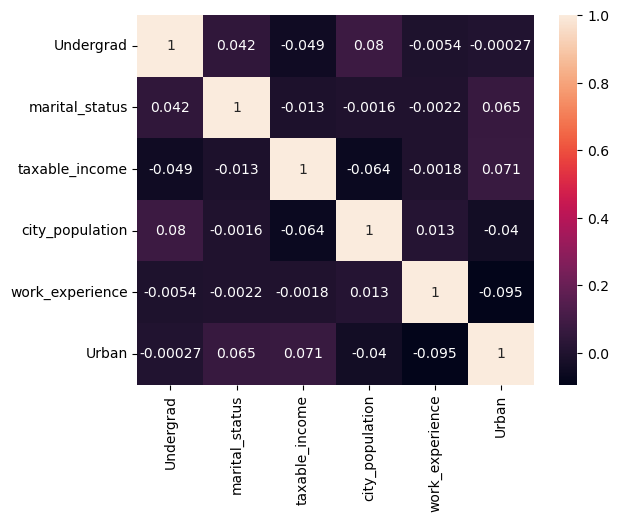

In [33]:
# heatmap shows the correlation between the column. 1 indicates there is 100% correlation between columns.
sns.heatmap(df.corr(),annot=True)

In [11]:
# whichever column has space,fullstop we rename that column.
df.rename(columns = {'Marital.Status':'marital_status','Taxable.Income':'taxable_income','City.Population':'city_population','Work.Experience':'work_experience'},inplace=True)

In [12]:
df.head()

Undergrad  marital_status  taxable_income  city_population  \
0          0               2           68833            50047   
1          1               0           33700           134075   
2          0               1           36925           160205   
3          1               2           50190           193264   
4          0               1           81002            27533   

   work_experience  Urban  
0               10      1  
1               18      1  
2               30      1  
3               15      1  
4               28      0

In [13]:
# in this dataset taxable_income column has condition if taxable_income<=30000 is risky otherwise good.
df[(df['taxable_income']>30000)].sum()

Undergrad               246
marital_status          497
taxable_income     30660248
city_population    51615815
work_experience        7410
Urban                   239
dtype: int64

### we have to develop model which can detect  taxable_income <= 30000 as "Risky" and others are "Good"

In [14]:
# we created a new column fraudcheck which satify the taxable_column condition if x<=30000 it is risky other good 
df["FraudCheck"] = df["taxable_income"].apply(lambda x: "Risky" if x <= 30000 else "Good")

In [15]:
df.head()

Undergrad  marital_status  taxable_income  city_population  \
0          0               2           68833            50047   
1          1               0           33700           134075   
2          0               1           36925           160205   
3          1               2           50190           193264   
4          0               1           81002            27533   

   work_experience  Urban FraudCheck  
0               10      1       Good  
1               18      1       Good  
2               30      1       Good  
3               15      1       Good  
4               28      0       Good

# Visualization

In [16]:
pe.box(df['FraudCheck']) # boxplot shows the outlier.

<AxesSubplot:>

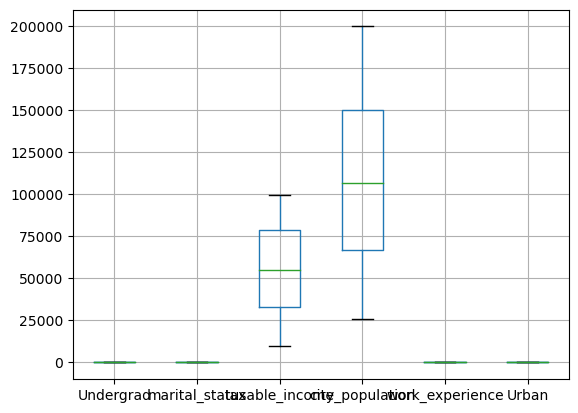

In [17]:
df.boxplot()

In [18]:
# it is an 3d scatter between three columns and color is working as hue which two value 1=risky and 0=good.
pe.scatter_3d(x=df['city_population'],y=df['work_experience'],z=df['marital_status'],color=df['FraudCheck'])

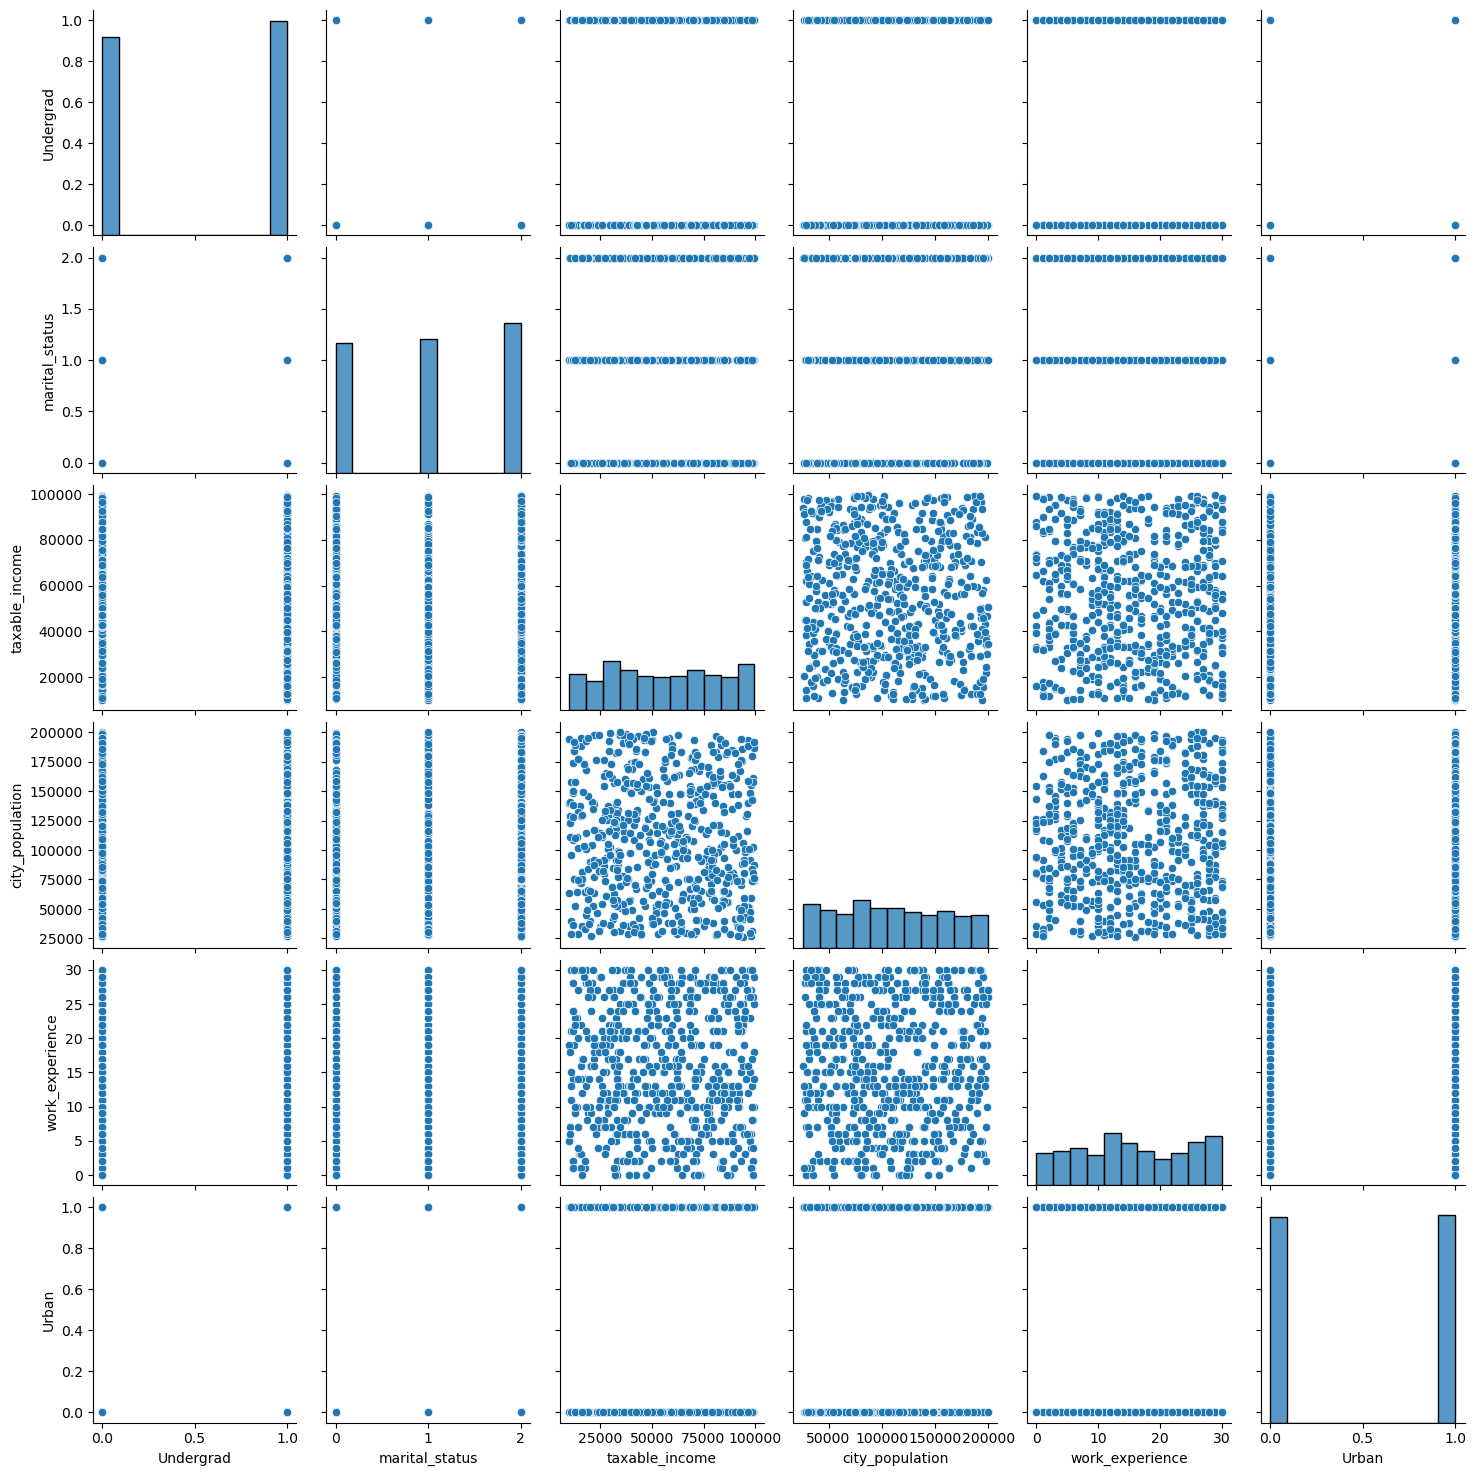

In [19]:
sns.pairplot(df) # pairplot shows the scatter plot between all the columns,

# Splitting Data

In [20]:
# splitting the data into training and testing part
x = df.iloc[:,:-1]
y = df['FraudCheck']

In [21]:
# labelencoder is used to convert fraudcheck column into numeric,good=0,risky=1
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [22]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

# model Building

In [23]:
from sklearn.metrics import classification_report

In [24]:
# after splitting data,model building is done.In this we used decisiontreeclassifier,becaused target column is present in a binary form
dt = DecisionTreeClassifier(criterion='entropy')
xtrain.count()

Undergrad          480
marital_status     480
taxable_income     480
city_population    480
work_experience    480
Urban              480
dtype: int64

In [25]:
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)

In [26]:
ypred

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

## Evaluation Metrics

In [27]:
# classification report is an evaluation metrics for classification.
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       1.00      1.00      1.00        23

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [28]:
dt.score(xtrain,ytrain),dt.score(xtest,ytest)

(1.0, 1.0)

###  training and testing accuracy is 1.0

# Visualisation

[Text(0.5, 0.75, 'taxable_income <= 30055.5\nentropy = 0.742\nsamples = 480\nvalue = [379, 101]\nclass = Good'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 101\nvalue = [0, 101]\nclass = Risky'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 379\nvalue = [379, 0]\nclass = Good')]

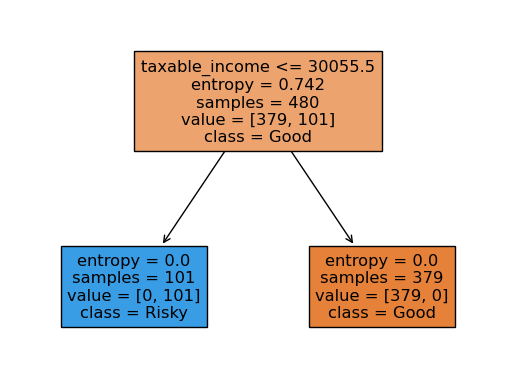

In [29]:
#tree created a taxable_income into a root node ,root node give us a two leaf node.
tree.plot_tree(dt,feature_names=x.columns,class_names=df['FraudCheck'].unique(),filled=True)

[Text(0.5, 0.75, 'taxable_income <= 30055.5\nentropy = 0.742\nsamples = 480\nvalue = [379, 101]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 101\nvalue = [0, 101]'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 379\nvalue = [379, 0]')]

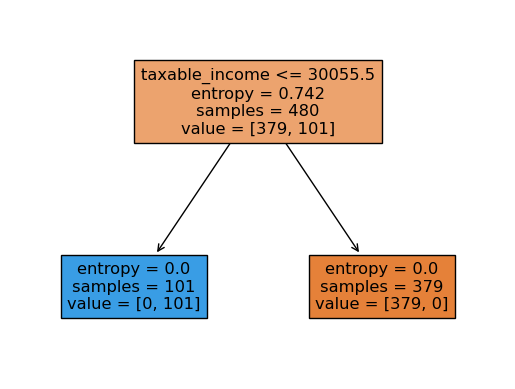

In [30]:
tree.plot_tree(dt,feature_names=x.columns,filled=True)

[Text(0.5, 0.75, 'X[2] <= 30055.5\nentropy = 0.742\nsamples = 480\nvalue = [379, 101]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 101\nvalue = [0, 101]'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 379\nvalue = [379, 0]')]

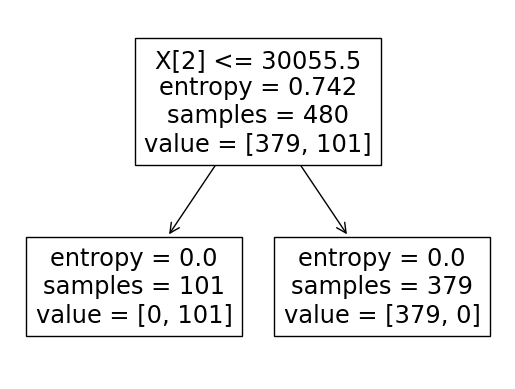

In [31]:
tree.plot_tree(dt)